In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[*********************100%***********************]  3 of 3 completed


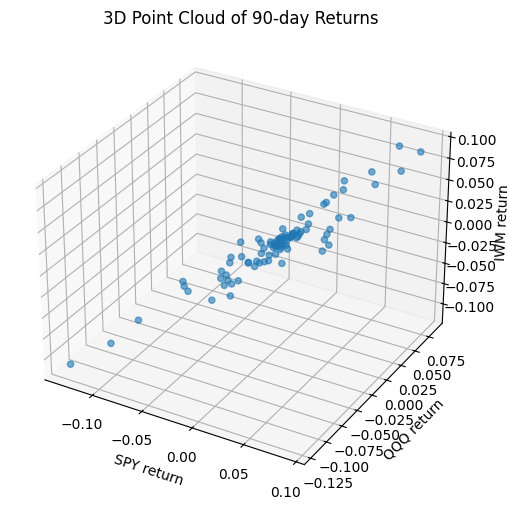

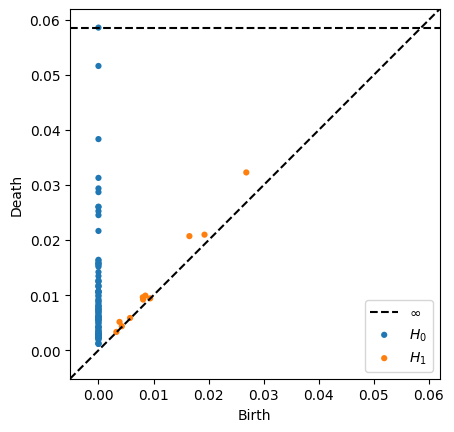

[0.05160782113671303, 0.05160782113671303, 0.03833719342947006, 0.005448704585433006, 0.004216169938445091, 0.0017386991530656815]


In [5]:
tickers = ['SPY','QQQ','IWM']
df = yf.download(tickers, start='2020-01-01', end='2025-05-01')['Close'].dropna()

rets = df.pct_change().dropna()
w = 90
win = rets.iloc[:w].values

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(win[:,0], win[:,1], win[:,2], s=20, alpha=0.6)
ax.set_xlabel('SPY return')
ax.set_ylabel('QQQ return')
ax.set_zlabel('IWM return')
ax.set_title('3D Point Cloud of 90-day Returns')
plt.show()

diagrams = ripser(win, maxdim=1)['dgms']
plot_diagrams(diagrams, show=True)
tda_feats = []
for dgm in diagrams:
    lifespans = dgm[:,1] - dgm[:,0]
    finite = lifespans[np.isfinite(lifespans)]
    if finite.size>0:
        lifespans = np.where(np.isfinite(lifespans), lifespans, finite.max())
    top3 = np.sort(lifespans)[::-1][:3]
    tda_feats.extend(top3)
print(tda_feats)